<a href="https://colab.research.google.com/github/sspradling78/SFAirport/blob/main/Project_1/Air_Traffic_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style= 'darkgrid', palette= 'flare')

In [ ]:
Air_Traffic = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
Air_Traffic.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
Air_Traffic.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
46665,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G,2198
46666,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E,419
46667,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,21468
46668,202106,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,4024
46669,202106,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Other,International,G,5238


In [ ]:
Air_Traffic.shape

(46670, 12)

In [ ]:
Air_Traffic.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object

In [ ]:
Air_Traffic['Activity Period'] = Air_Traffic['Activity Period'].map(str)

In [ ]:
Air_Traffic['Activity Period'] = Air_Traffic['Activity Period'].astype(str).str[:4] + '-' + Air_Traffic['Activity Period'].astype(str).str[4:]
Air_Traffic.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,2005-07,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,2005-07,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,2005-07,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,2005-07,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,2005-07,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
Air_Traffic['Activity Period'] = pd.to_datetime(Air_Traffic['Activity Period'])

In [ ]:
Air_Traffic['Year'] = Air_Traffic['Activity Period'].dt.year
Air_Traffic['Month'] = Air_Traffic['Activity Period'].dt.month
Air_Traffic.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [ ]:
#Air_Traffic = Air_Traffic.replace(to_replace= "Low Fare", value= 1)
#Air_Traffic = Air_Traffic.replace(to_replace= "Other", value= 2)

In [ ]:
#Air_Traffic = Air_Traffic.replace(to_replace= "Deplaned", value= 1)
#Air_Traffic = Air_Traffic.replace(to_replace= "Enplaned", value= 2)
#Air_Traffic = Air_Traffic.replace(to_replace= "Thru / Transit", value= 3)

In [ ]:
Air_Traffic.dtypes

Activity Period                datetime64[ns]
Operating Airline                      object
Operating Airline IATA Code            object
Published Airline                      object
Published Airline IATA Code            object
GEO Summary                            object
GEO Region                             object
Activity Type Code                     object
Price Category Code                    object
Terminal                               object
Boarding Area                          object
Passenger Count                         int64
Year                                    int64
Month                                   int64
dtype: object

In [ ]:
Air_Traffic['Terminal'].value_counts()

International    30212
Terminal 1        8080
Terminal 3        6437
Terminal 2        1887
Other               54
Name: Terminal, dtype: int64

In [ ]:
Air_Traffic = Air_Traffic[Air_Traffic['Terminal'] != 2]

In [ ]:
Air_Traffic

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,2021-06-01,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G,2198,2021,6
46666,2021-06-01,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E,419,2021,6
46667,2021-06-01,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,21468,2021,6
46668,2021-06-01,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,4024,2021,6


In [ ]:
Air_Traffic['Boarding Area'].value_counts()

A        16358
G        13894
B         4656
F         4059
C         3384
E         2378
D         1887
Other       54
Name: Boarding Area, dtype: int64

In [ ]:
#AT_NaN = Air_Traffic[Air_Traffic.isna().any(axis=1)]


In [ ]:
Air_Traffic.isnull().sum()

Activity Period                  0
Operating Airline                0
Operating Airline IATA Code    151
Published Airline                0
Published Airline IATA Code    151
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
Year                             0
Month                            0
dtype: int64

In [ ]:
Air_Traffic.fillna('None', inplace= True)

In [ ]:
Air_Traffic.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Year                           0
Month                          0
dtype: int64

In [ ]:
Air_Traffic['GEO Region'].value_counts()

US                     16642
Asia                    9987
Europe                  7493
Canada                  4294
Mexico                  3568
Australia / Oceania     2498
Central America         1014
Middle East              992
South America            182
Name: GEO Region, dtype: int64

In [ ]:
Air_Traffic_US = Air_Traffic[Air_Traffic['GEO Region'] == 'US']
Air_Traffic_Europe = Air_Traffic[Air_Traffic['GEO Region'] == 'Europe']
Air_Traffic_Asia = Air_Traffic[Air_Traffic['GEO Region'] == 'Asia']
Air_Traffic_Canada = Air_Traffic[Air_Traffic['GEO Region'] == 'Canada']
Air_Traffic_Mexico = Air_Traffic[Air_Traffic['GEO Region'] == 'Mexico']
Air_traffic_Australia = Air_Traffic[Air_Traffic['GEO Region'] == 'Australia / Oceania']
Air_traffic_C_America = Air_Traffic[Air_Traffic['GEO Region'] == 'Central America']
Air_Traffic_Mid_East = Air_Traffic[Air_Traffic['GEO Region'] == 'Middle East']
Air_traffic_S_America = Air_Traffic[Air_Traffic['GEO Region'] == 'South America']

In [ ]:
Air_Traffic_US.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,1,1,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,2,1,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,3,1,Terminal 1,B,5415,2005,7
11,2005-07-01,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,1,1,International,A,8055,2005,7
12,2005-07-01,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,2,1,International,A,7984,2005,7


In [ ]:
Air_Traffic_US['Published Airline'].value_counts()

United Airlines                      2280
Delta Air Lines                      2092
United Airlines - Pre 07/01/2013     2014
Alaska Airlines                      1914
American Airlines                    1620
Southwest Airlines                    946
JetBlue Airways                       843
US Airways                            814
Frontier Airlines                     770
Hawaiian Airlines                     762
Sun Country Airlines                  716
Virgin America                        522
AirTran Airways                       452
Northwest Airlines (became Delta)     256
Midwest Airlines                      232
ATA Airlines                           82
Servisair                              68
Spirit Airlines                        48
Republic Airlines                      48
Allegiant Air                          32
Miami Air International                30
Swissport USA                          21
Independence Air                       20
Xtra Airways                      

In [ ]:
Air_Traffic_US['Activity Type Code'].value_counts()

Deplaned          7737
Enplaned          7717
Thru / Transit    1188
Name: Activity Type Code, dtype: int64

In [ ]:
Air_Traffic_US['Terminal'].value_counts()

Terminal 1       7648
Terminal 3       3798
International    3502
Terminal 2       1644
Other              50
Name: Terminal, dtype: int64

In [ ]:
Air_Traffic_US['Price Category Code'].value_counts()

Other       11831
Low Fare     4811
Name: Price Category Code, dtype: int64

In [ ]:
Air_Traffic_US.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
11,2005-07-01,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Deplaned,Low Fare,International,A,8055,2005,7
12,2005-07-01,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Enplaned,Low Fare,International,A,7984,2005,7


In [ ]:
Air_Traffic_US.to_csv('Air_Traffic_US.csv')

In [ ]:
Air_Traffic_US.loc[Air_Traffic_US['Published Airline'] == 'Delta Air Lines']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
29,2005-07-01,Atlantic Southeast Airlines,EV,Delta Air Lines,DL,Domestic,US,1,2,Terminal 1,C,1552,2005,7
30,2005-07-01,Atlantic Southeast Airlines,EV,Delta Air Lines,DL,Domestic,US,2,2,Terminal 1,C,1484,2005,7
39,2005-07-01,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,1,2,Terminal 1,C,97510,2005,7
40,2005-07-01,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,2,2,Terminal 1,C,93791,2005,7
75,2005-07-01,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,1,2,Terminal 1,C,7262,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46587,2021-06-01,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,2,2,Terminal 2,D,14489,2021,6
46627,2021-06-01,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,1,2,Terminal 1,C,15417,2021,6
46628,2021-06-01,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,2,2,Terminal 1,C,16873,2021,6
46631,2021-06-01,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,1,2,Terminal 2,D,3475,2021,6


In [ ]:
Air_Traffic_US['Terminal'].value_counts()

Terminal 1       7648
Terminal 3       3798
International    3502
Terminal 2       1644
2                  50
Name: Terminal, dtype: int64

In [ ]:
Air_Traffic_US['Year'].value_counts()

2007    1250
2008    1240
2009    1128
2006    1116
2018    1100
2010    1064
2017    1054
2011    1038
2012    1018
2014     998
2013     974
2019     974
2015     956
2016     956
2020     852
2005     580
2021     344
Name: Year, dtype: int64

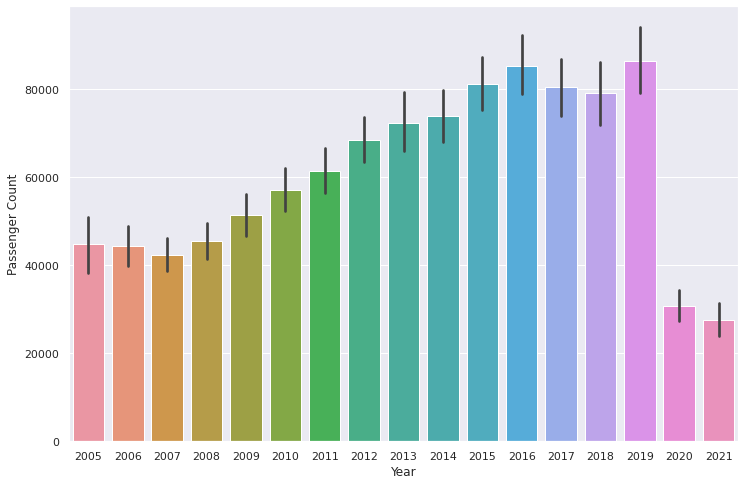

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x= 'Year', y= 'Passenger Count', data= Air_Traffic_US);

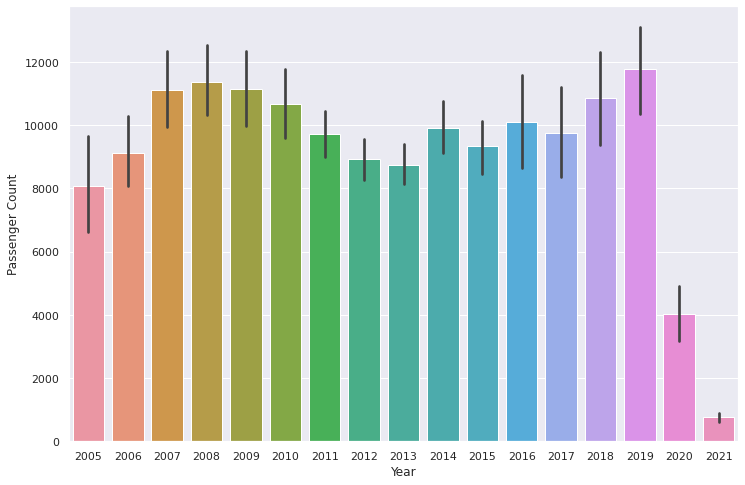

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x= 'Year', y= 'Passenger Count', data= Air_Traffic_Canada);

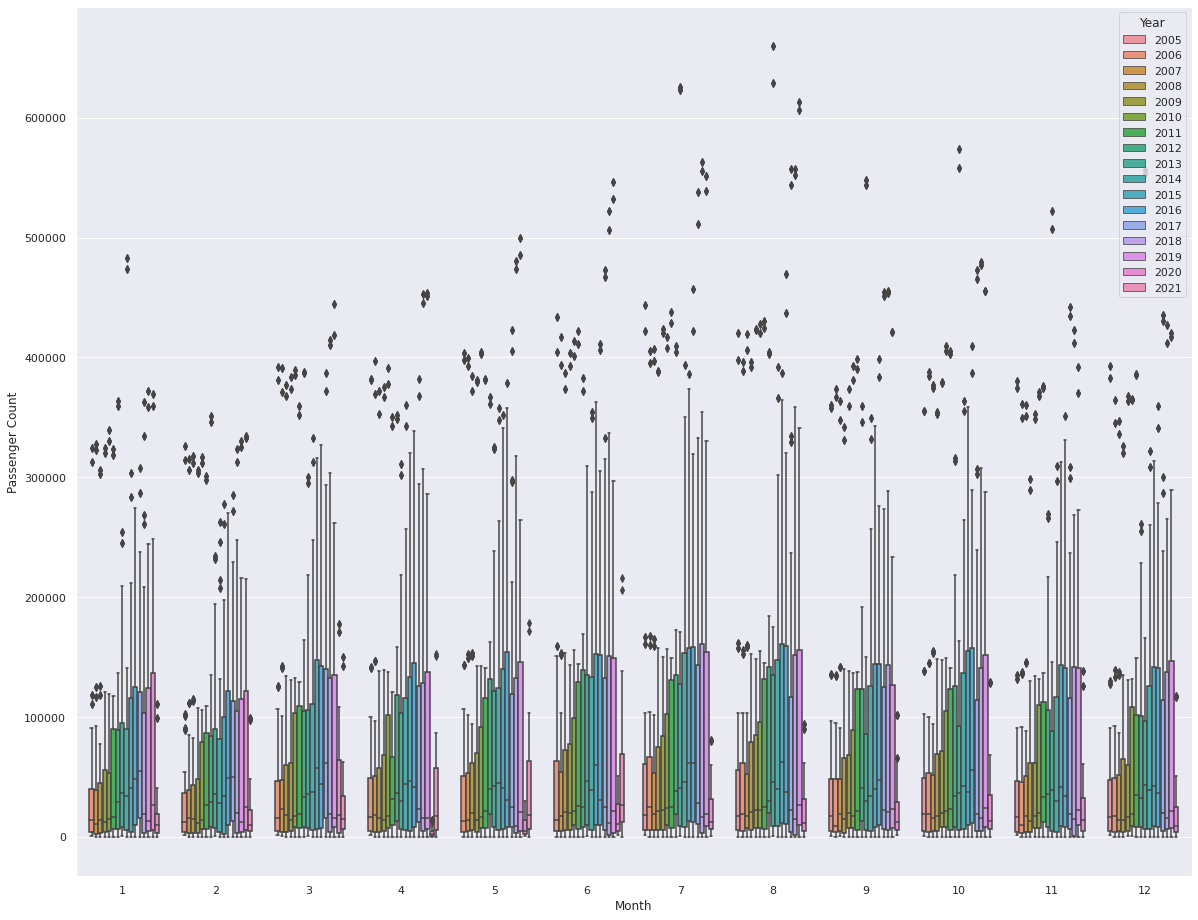

In [ ]:
plt.figure(figsize = (20, 16))
sns.boxplot(x= "Month", y= "Passenger Count", data= Air_Traffic_US, hue= 'Year');

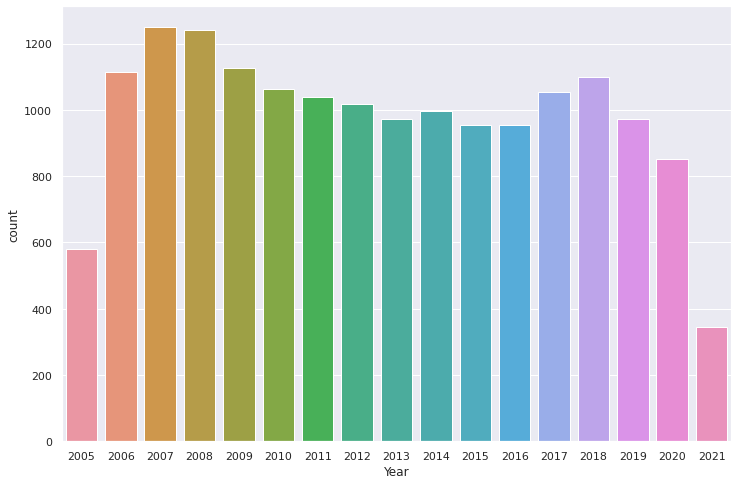

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(x= 'Year', data= Air_Traffic_US);

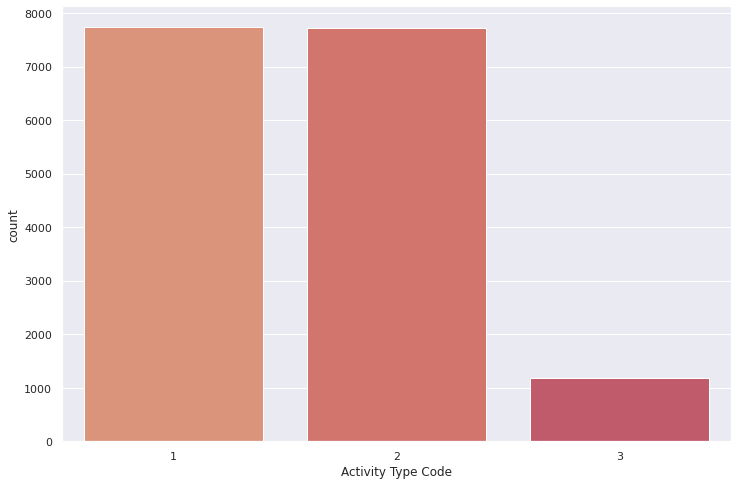

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(x= 'Activity Type Code', data= Air_Traffic_US);